## Fetch Dataset

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflowjs as tfjs

In [4]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

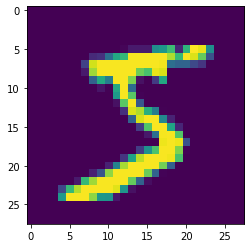

In [6]:
plt.imshow(x_train[0])

In [7]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Preprocessing

In [8]:
# Normalization
x_train = x_train/255
x_test = x_test/255

In [9]:
# flattening the train image to act as input for neural network
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_train_flatten.shape

(60000, 784)

In [10]:
x_train_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
x_test_flatten = x_test.reshape(len(x_test), 28*28)
x_test_flatten.shape

(10000, 784)

In [12]:
x_test_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
x_test_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Neural Network Structure

In [15]:
cnn = tf.keras.Sequential() # base layer
cnn.add(tf.keras.layers.Dense(units=784,activation='relu')) # imput layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax')) # output layer
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training the CNN

In [16]:
cnn.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1924 - accuracy: 0.9424
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0756 - accuracy: 0.9766
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0500 - accuracy: 0.9843
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0346 - accuracy: 0.9887
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0282 - accuracy: 0.9910


## Evaluating on Test Set

In [17]:
cnn.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0760 - accuracy: 0.9785


[0.07595108449459076, 0.9785000085830688]

## Predicting the entire Test Set

In [18]:
y_predict = cnn.predict(x_test_flatten)

313/313 [==============================] - 1s 2ms/step


## Single Precidiction

In [19]:
number = 566

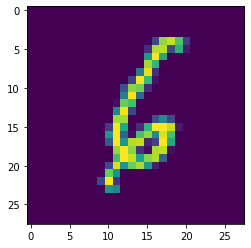

In [20]:
plt.imshow(x_test[number])

In [21]:
y_predict[number] # all 10 probabilities

array([1.4546060e-05, 5.9056134e-08, 2.0964731e-05, 6.4129074e-07,
       2.1593682e-05, 5.1006649e-05, 9.9989116e-01, 1.3252770e-08,
       2.6043905e-08, 6.8837758e-10], dtype=float32)

In [22]:
np.argmax(y_predict[number])

6